In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
seq_length = 50
X, y = [], []
sine_wave = np.sin(np.linspace(0, 100, 1050))  # Synthetic sequence data

for i in range(len(sine_wave)-seq_length):
    X.append(sine_wave[i:i+seq_length])   # Last 50 points → input
    y.append(sine_wave[i+seq_length])    # Next point → target

X = np.array(X).reshape((len(X), seq_length, 1))  # 3D input for LSTM
y = np.array(y)


In [3]:
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(seq_length,1)))  # LSTM layer
model.add(Dense(1))  # Output layer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()

C:\Users\Nanditha Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.3395 - val_loss: 0.1058
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0302 - val_loss: 0.0039
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0013 - val_loss: 4.6172e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 4.6145e-04 - val_loss: 3.7230e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 3.3756e-04 - val_loss: 3.0360e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 2.6966e-04 - val_loss: 2.4625e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.1318e-04 - val_loss: 1.6488e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.4831e-04 - val_loss: 1.2304e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.0144e-04 - val_loss: 8.1432e-05
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 6.2269e-05 - val_loss: 4.5559e-05
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 3.6998e-05 - val_loss: 2.7093

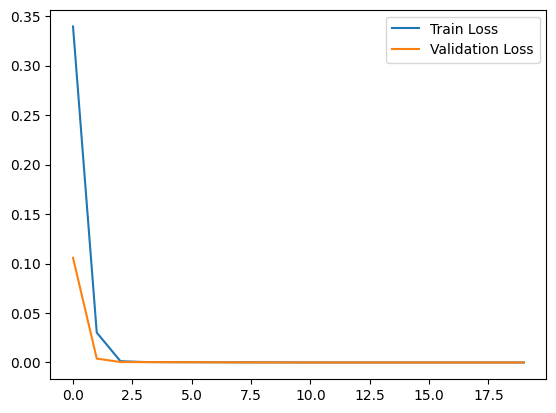

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step


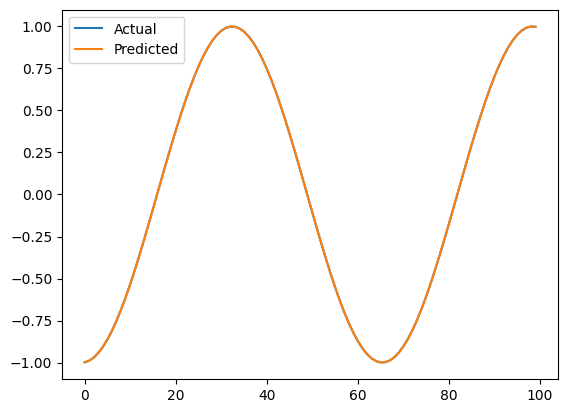

In [5]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

predictions = model.predict(X[:100])
plt.plot(y[:100], label='Actual')
plt.plot(predictions.flatten(), label='Predicted')
plt.legend()
plt.show()
